# More On Missing Data

## Introduction

Now that you've seen various methods of how to deal with missing data, its time to further discuss how to choose and appropriate methodology given a particular scenario. Commonly, many people will immediately turn to imputing the mean or median of a feature with missing values. This can be valid and effective methodology, hence why it is standard, but does have caveats. For example, doing so will reduce the overall variance of your dataset which should be taken into account when performing subsequent analyses or training a machine learning algorithm on the data set.

## Objectives

You will be able to: 

* Consider the impacts of various techniques for dealing with missing data.
* Check a dataset for duplicates
* Uncover missing values that are not null

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('titanic.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0.0,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,1,1.0,2.0,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,2,2.0,3.0,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,3,3.0,4.0,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,4,4.0,5.0,0.0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


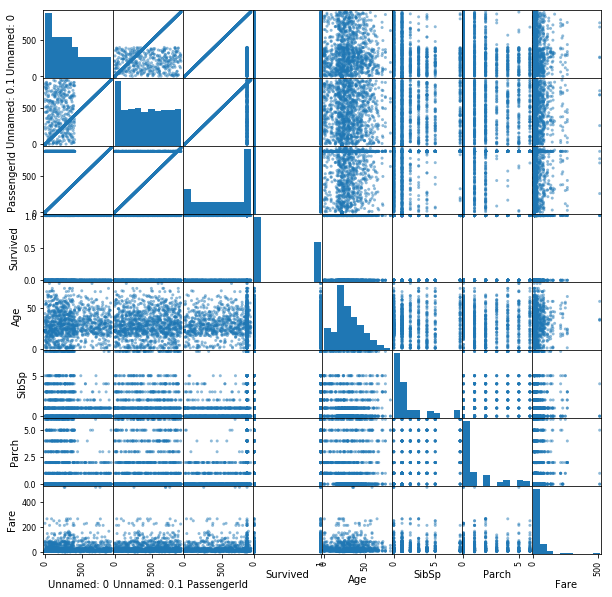

In [3]:
pd.plotting.scatter_matrix(df, figsize=(10,10));

## Checking for Missing Data

Typically, the first step in checking for missing data is to simply use the df.info() method. This gives us various information about the columns including their data type and the number of non-null values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 14 columns):
Unnamed: 0      1391 non-null int64
Unnamed: 0.1    1391 non-null float64
PassengerId     1391 non-null float64
Survived        1391 non-null float64
Pclass          1391 non-null object
Name            1391 non-null object
Sex             1391 non-null object
Age             1209 non-null float64
SibSp           1391 non-null float64
Parch           1391 non-null float64
Ticket          1391 non-null object
Fare            1391 non-null float64
Cabin           602 non-null object
Embarked        1289 non-null object
dtypes: float64(7), int64(1), object(6)
memory usage: 152.2+ KB


As you can see, Age and Cabin have a substantial amount of missing values, and Embarked has 2 extraneous missing values.

## Checking for Duplicates

While `df.info()` is a good initial spot check for missing values, it may not catch more subtle anomalies in the data such as duplicates. While these values are populated, it is always worrisome if we have observation rows with identical data.

In [4]:
duplicates = df[df.duplicated()]
print(len(duplicates))
duplicates.head()

100


,Unnamed: 0,Unnamed: 0.1,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
891,0,0.0,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,NaN,S
892,0,0.0,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,NaN,S
893,0,0.0,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,NaN,S
894,0,0.0,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,NaN,S
895,0,0.0,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,NaN,S


Similarly, if a feature such as PassengerId can be assumed to be unique, we can further check if there are duplicate rows based on a subset of the DataFrame columns.

In [5]:
duplicates = df[df.duplicated(subset='PassengerId')]
print(len(duplicates))
duplicates.tail()

500


,Unnamed: 0,Unnamed: 0.1,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1386,395,257.0,839.0,0.0,?,"Rush, Mr. Alfred George John",male,47.0,0.0,4.0,113510,12.8750,B79,C
1387,396,300.0,839.0,1.0,2,"Skoog, Master. Harald",female,17.0,5.0,5.0,2671,17.4000,E49,NaN
1388,397,65.0,839.0,0.0,?,"Slocovski, Mr. Selman Francis",male,47.0,8.0,4.0,239854,7.0500,B49,NaN
1389,398,807.0,839.0,1.0,?,"Glynn, Miss. Mary Agatha",male,48.0,1.0,0.0,36866,8.6625,F G63,C
1390,399,664.0,839.0,0.0,?,"Sobey, Mr. Samuel James Hayden",male,14.5,3.0,4.0,2672,108.9000,C148,S


## Checking for extraneous values

Sometimes, null values are even further hidden within a dataset. For example, sometimes an entry such as `999999` is used for missing values, or an arbitrary date such as `12-01-1970` might be set for unknown dates. In general, doing a quick eyeball and previewing the top occurring values for each feature can help further tease out peculiarities in the data set.

In [6]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

Unnamed: 0 
 0      0.073329
264    0.001438
274    0.001438
273    0.001438
272    0.001438
Name: Unnamed: 0, dtype: float64 


Unnamed: 0.1 
 0.0      0.073329
680.0    0.003595
816.0    0.003595
2.0      0.002876
420.0    0.002876
Name: Unnamed: 0.1, dtype: float64 


PassengerId 
 839.0    0.288282
1.0      0.072610
881.0    0.000719
757.0    0.000719
195.0    0.000719
Name: PassengerId, dtype: float64 


Survived 
 0.0    0.618979
1.0    0.381021
Name: Survived, dtype: float64 


Pclass 
 3    0.475198
1    0.219267
2    0.199137
?    0.106398
Name: Pclass, dtype: float64 


Name 
 Braund, Mr. Owen Harris                      0.072610
Stone, Mrs. George Nelson (Martha Evelyn)    0.003595
van Melkebeke, Mr. Philemon                  0.002876
Maioni, Miss. Roberta                        0.002876
Chapman, Mr. John Henry                      0.002876
Name: Name, dtype: float64 


Sex 
 male      0.641265
female    0.358735
Name: Sex, dtype: float64 


Age 
 22.0    0.106700
18.0    0.

You can see that we've uncovered another case of missing data that did not show up before! The Pclass feature has `?` for roughly 10% of the entries.

## Choosing a Methodology

Now that you have some ideas of various methods for dealing with missing data, how do you choose which to use? The answer will depend on the scenario and specifics to the application itself. As a general rule of thumb, we tend towards imputing values rather than dropping them, as we wish to use as much information as possible. That said, larger gaps where data is missing can pose more substantial problems, and thereby warrant alternative approaches. We'll take a look at specific cases below in more detail, but here's a quick table of your options.

|         | Continuous          | Categorical  |
| ------------- |:-------------:| -----:|
| Delete      | Delete Rows (observations) <br> Delete column (entire variable)| Delete Rows (observations) <br> Delete column (entire variable)|
| Replace | replace using median/mean | replace using mode
| Keep | keep as NA (not possible for many ML algorithms) | NA category

## Imputing Values

Imputing values is often a go to option when dealing with missing data. For example, if we are building a machine learning model with the data, many algorithms cannot handle missing values. By imputing data, we still get to use the full extent of the data at hand without having to throw away data, which, as you know, is an easy option.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 14 columns):
Unnamed: 0      1391 non-null int64
Unnamed: 0.1    1391 non-null float64
PassengerId     1391 non-null float64
Survived        1391 non-null float64
Pclass          1391 non-null object
Name            1391 non-null object
Sex             1391 non-null object
Age             1209 non-null float64
SibSp           1391 non-null float64
Parch           1391 non-null float64
Ticket          1391 non-null object
Fare            1391 non-null float64
Cabin           602 non-null object
Embarked        1289 non-null object
dtypes: float64(7), int64(1), object(6)
memory usage: 152.2+ KB


## Considerations When Imputing

When imputing missing values, keep in mind that you are influencing the distribution of this variable. For example, if you impute the mean, you will reduce the variance of that feature. 

## When to Drop Rows


Dropping rows is an appropriate choice if there are very few missing values to start with. After all, we do not wish to throw away troves of data if we have it, so cases in which there are larger occurrences of missing values, dropping all occurrences is typically inadvisable.

## When to Drop Columns

Dropping columns is typically a last case resort. That said, if a feature does not add predictive value to the machine learning algorithm driving your application, dropping said feature has no cost.

A few simple lines such as this can easily subset your DataFrame:  
~~~
cols_to_remove = ['col1', 'col2']
cols = [col for col in df.columns if col not in cols_to_remove]
subset = df[cols]
~~~

## Summary

In this lesson, we took a look at methods for identifying duplicate data as well as missing data that is not null, but filled with a placeholder value (such as ?). We also began to discuss considerations when dealing with missing data, which you yourself will further grapple with in the upcoming lab.